In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
df = pd.read_csv("/content/tennis.csv")
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [ ]:
df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   windy     14 non-null     bool  
 4   play      14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [ ]:
df.dtypes

outlook     object
temp        object
humidity    object
windy         bool
play        object
dtype: object

In [ ]:
df.isnull().sum()

outlook     0
temp        0
humidity    0
windy       0
play        0
dtype: int64

In [ ]:
columns_to_encode = ['outlook', 'temp', 'humidity', 'windy']
le = LabelEncoder()
for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])


In [ ]:
X = df.drop('play', axis=1)
y = df['play']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)
data_unpruned =DecisionTreeClassifier(max_depth=None, random_state=42)
data_model = data_unpruned.fit(X_train, y_train)
print("Performance without pruning:", data_model.score(X_test, y_test))
print("At depth:", data_model.tree_.max_depth)

Performance without pruning: 0.75
At depth: 4


In [ ]:
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

<function matplotlib.pyplot.show(close=None, block=None)>

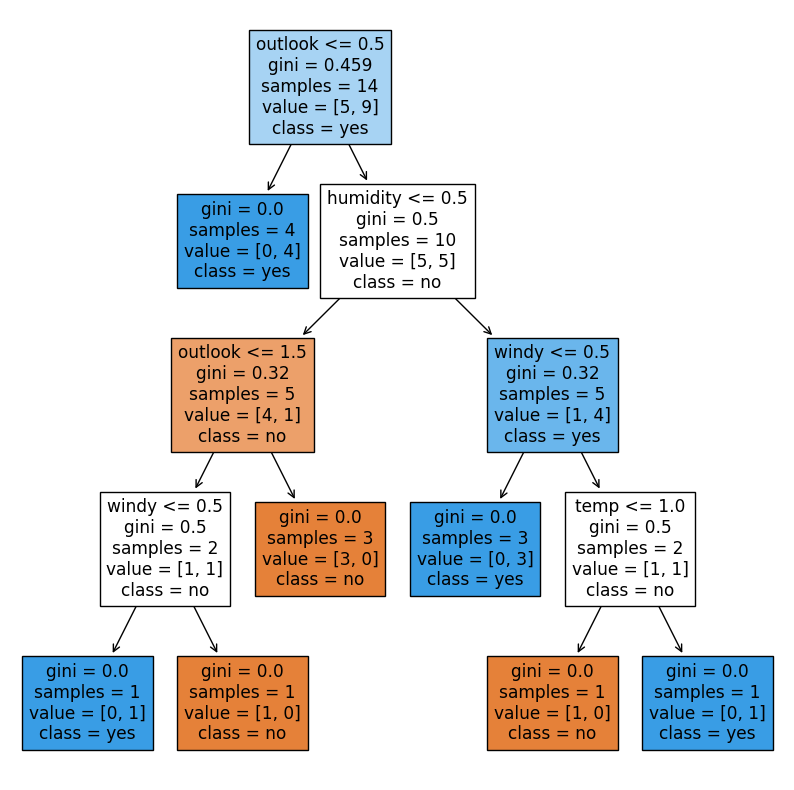

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(model, feature_names=X.columns, class_names=y.unique(), filled=True, ax=ax)

plt.show

In [ ]:
y_pred = data_unpruned.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"accuracy : {accuracy}")

accuracy : 75.0


In [ ]:
confusion_matrix(y_test, y_pred)

array([[1, 0],
       [1, 2]])

In [ ]:
df1 = pd.read_csv("/content/HousingData.csv")
df1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
df1.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
df1['CHAS']=df1['CHAS'].astype(object)

In [ ]:
df1[['CRIM','ZN','INDUS','AGE','LSTAT']] = df1[['CRIM','ZN','INDUS','AGE','LSTAT']].fillna((df1[['CRIM','ZN','INDUS','AGE','LSTAT']].mean()))

In [ ]:
df1['CHAS']=df1['CHAS'].fillna(method='bfill')

In [ ]:
X=df1.iloc[:,0:-1]
y=df1.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=6)
DT_reg=regressor.fit(X_train, y_train)

In [ ]:
DT_reg

DecisionTreeRegressor(max_depth=6)

In [ ]:
y_pred=DT_reg.predict(X_test)

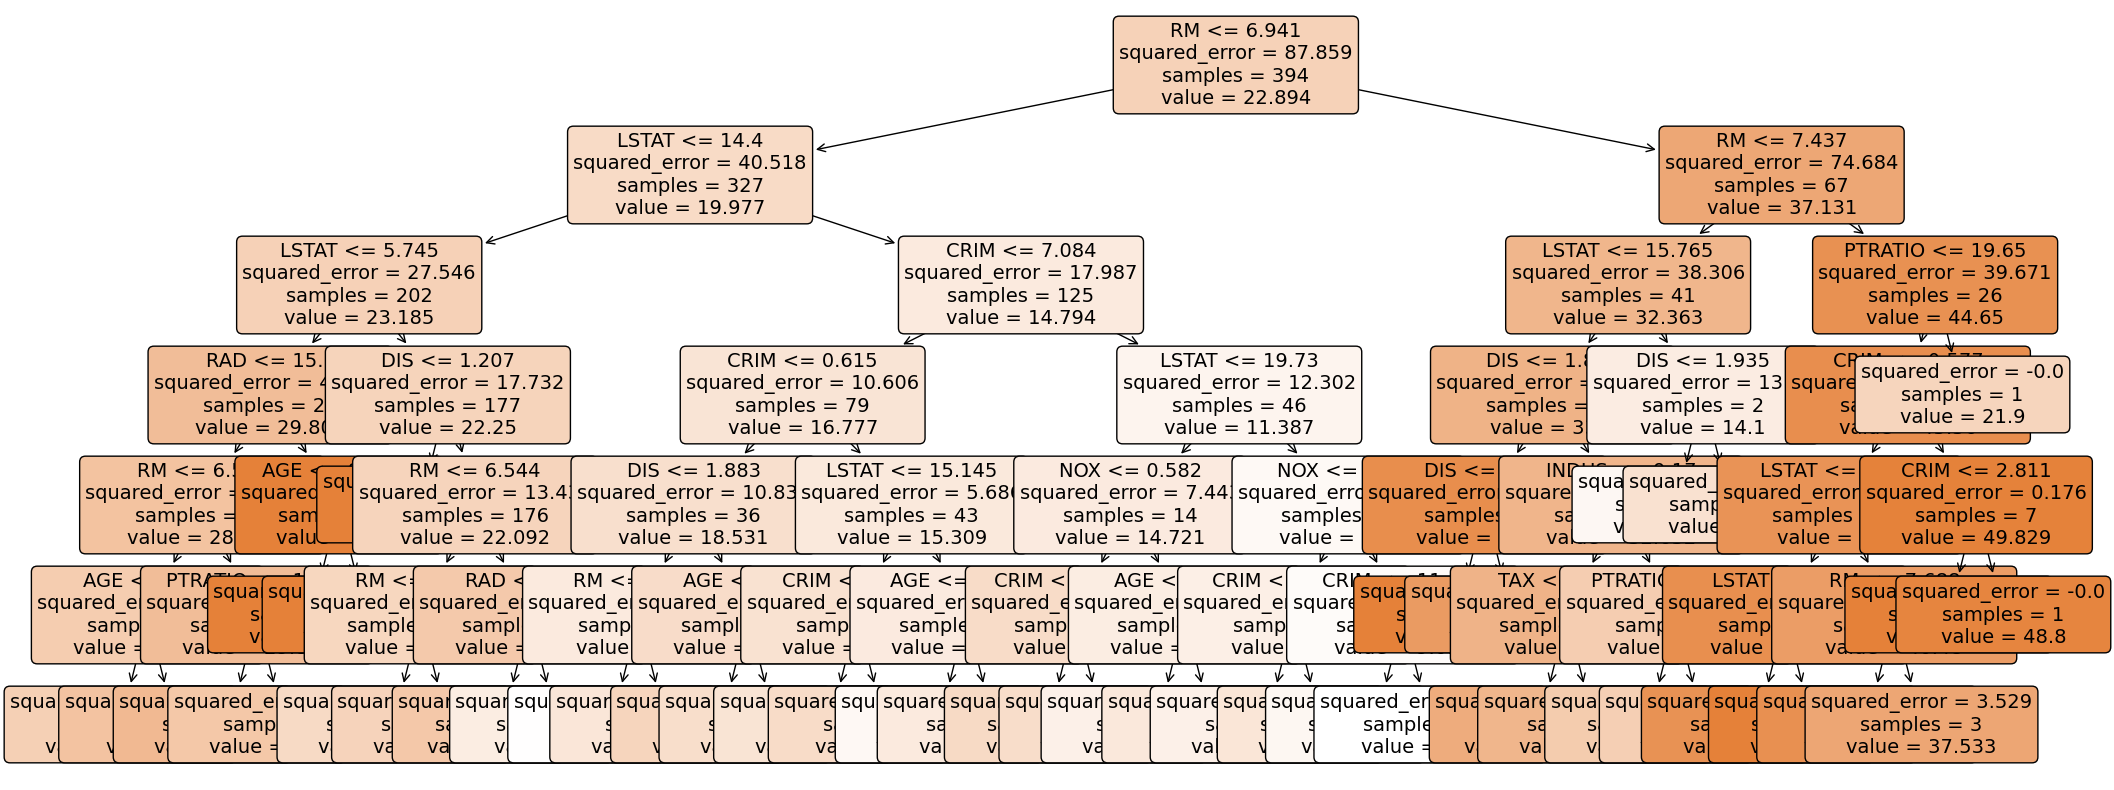

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,10))
a = plot_tree(regressor,
              feature_names=X.columns,
              class_names=Y,
              filled=True,
              rounded=True,
              fontsize=14)